In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape
x_data = mnist.data
y_data = mnist.target

In [3]:
print(x_data.shape)
print(y_data.shape)

(70000, 784)
(70000,)


In [4]:
print(x_data.iloc[0])
print(y_data.iloc[0])

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64
5


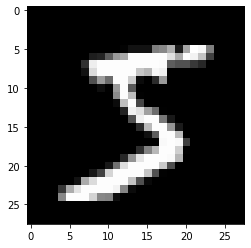

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_data.iloc[0].values.reshape(28,28), cmap='gray')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56000, 784)
(14000, 784)
(56000,)
(14000,)


In [7]:
model = LogisticRegression(max_iter=10, tol=0.0001, penalty='l2', C=1.0)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_train_predict)
print(train_acc)

y_test_predict = model.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_test_predict)
print(test_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8824107142857143
0.8825714285714286


In [8]:
model = LogisticRegression(max_iter=100, tol=0.0001, penalty='l2', C=1.0)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_train_predict)
print(train_acc)

y_test_predict = model.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_test_predict)
print(test_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9360892857142857
0.9178571428571428


In [9]:
model = LogisticRegression(max_iter=1000, tol=0.0001, penalty='l2', C=1.0)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_train_predict)
print(train_acc)

y_test_predict = model.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_test_predict)
print(test_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9431428571428572
0.9165714285714286


### max_iter를 늘리면 정확도는 더 좋아지지만 나중에는 오버피팅이 일어날 것이다.
---
# Pytorch

In [10]:
!pip install torch
!pip install torchvision

## Tensor
- 하나의 데이터타입을 포함하는 다차원행렬 
- Pytorch의 연산 기본단위 
- numpy : data / tensor : data + grad, gpu에서 연산가능
- grad는 Tensro의 연산을 기억하고 gradient value를 자동으로 계산
  * model 학습을 위해서는 각 레이어의 미분값을 알아야 함

In [11]:
import torch
x = torch.zeros(4)
print(x)

tensor([0., 0., 0., 0.])


In [12]:
x = torch.zeros([2,3])
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [13]:
x = torch.ones(4)
print(x)

tensor([1., 1., 1., 1.])


In [14]:
x = torch.ones([2,3,1])
print(x)

tensor([[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]])


In [15]:
import numpy as np
import torch

In [16]:
data = [[1,2,3], [4,5,6]]
x = torch.tensor(data)
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [18]:
data_arr = np.array([[4,3],[1,3],[5,5]])
x = torch.tensor(data_arr)
print(x)

tensor([[4, 3],
        [1, 3],
        [5, 5]])


In [19]:
x = torch.from_numpy(data_arr)
print(x)

tensor([[4, 3],
        [1, 3],
        [5, 5]])


In [20]:
x = torch.randn([3,5])
print(x)

tensor([[-0.5861, -1.4275,  0.7065,  0.1544,  0.0442],
        [-1.2541, -0.4642,  0.4140, -1.6152, -0.8907],
        [ 0.2709, -0.7799,  0.1627,  0.3728, -0.1452]])


In [21]:
tensor = torch.rand([2,3]) # 2행 3열

# Attributes of tensor
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

# Standard numpy-like indexing and sclicing
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:,0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0 # 두번째 컬럼 값을 모두 0으로 지정
print(tensor)

Shape of tensor: torch.Size([2, 3])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
First row: tensor([0.9716, 0.2431, 0.7750])
First column: tensor([0.9716, 0.6953])
Last column: tensor([0.7750, 0.9264])
tensor([[0.9716, 0.0000, 0.7750],
        [0.6953, 0.0000, 0.9264]])


In [22]:
import torch
import torch.nn as nn
import numpy as np

In [25]:
## Tensor
## Directly initializing
tensor_one = torch.tensor([[5,8,6],[8,4,5]], dtype=torch.float64, requires_grad=True)

# Randomly initializing tensor with shape of [2,3]
tensor_two = torch.randn([2,3], dtype=torch.float64, requires_grad=True)
print(tensor_one)
print(tensor_two, '\n')

## Arithmetic operations
y1 = torch.add(tensor_one, tensor_two)
y2 = tensor_one + tensor_two
print(y1)
print(y2, '\n')

y1 = torch.mul(tensor_one, tensor_two)
y2 = tensor_one * tensor_two
print(y1)
print(y2, '\n')

y1 = torch.matmul(tensor_one, tensor_two.T)
y2 = tensor_one@tensor_two.T
print(y1)
print(y2, '\n')

tensor([[5., 8., 6.],
        [8., 4., 5.]], dtype=torch.float64, requires_grad=True)
tensor([[-0.5961,  0.4550, -0.3670],
        [ 0.7655,  0.6903, -0.0475]], dtype=torch.float64, requires_grad=True) 

tensor([[4.4039, 8.4550, 5.6330],
        [8.7655, 4.6903, 4.9525]], dtype=torch.float64, grad_fn=<AddBackward0>)
tensor([[4.4039, 8.4550, 5.6330],
        [8.7655, 4.6903, 4.9525]], dtype=torch.float64, grad_fn=<AddBackward0>) 

tensor([[-2.9806,  3.6403, -2.2019],
        [ 6.1236,  2.7612, -0.2377]], dtype=torch.float64,
       grad_fn=<MulBackward0>)
tensor([[-2.9806,  3.6403, -2.2019],
        [ 6.1236,  2.7612, -0.2377]], dtype=torch.float64,
       grad_fn=<MulBackward0>) 

tensor([[-1.5421,  9.0644],
        [-4.7836,  8.6471]], dtype=torch.float64, grad_fn=<MmBackward0>)
tensor([[-1.5421,  9.0644],
        [-4.7836,  8.6471]], dtype=torch.float64, grad_fn=<MmBackward0>) 



- requires_gra = True : tensor 연산할 때 gradient를 자동으로 tracking함
- backward() : gradient 계산

In [26]:
x = torch.tensor([5], dtype=torch.float64, requires_grad=True)
y = torch.tensor([2], dtype=torch.float64, requires_grad=True)
z = x*y
z.backward()
print(x.grad)
print(y.grad)

tensor([2.], dtype=torch.float64)
tensor([5.], dtype=torch.float64)


- tensor -> numpy / numpy -> tensor를 했을 떄 tensor와 numpy arrat가 cpu에 있다면 메모리를 공유함

In [28]:
t = torch.ones(5)
print(f"t: {t}")

n = t.numpy()
print(f"n: {n}")

t.add_(3)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([4., 4., 4., 4., 4.])
n: [4. 4. 4. 4. 4.]


- 메모리를 공유하기 때문에 3을 t에만 더했음에도 불구하고 n에도 더해짐


- view -> tensor의 shape을 바꿔줌

In [29]:
## torch.view
x1 = torch.rand(4,5)
x2 = x1.view(20)
x3 = x1.view(2, -1) # 행은 2로 맞추고 열은 자동으로 맞춰주렴 -> 2행 10열
x4 = x1.view(2,2,5)
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)

torch.Size([4, 5])
torch.Size([20])
torch.Size([2, 10])
torch.Size([2, 2, 5])


- squeeze : tensor 차원 축소
- unsqueeze : tensor 차원 확장

In [31]:
## squeeze
x1 = torch.randn(3,1,1,3)
print(x1, x1.shape)
x2 = x1.squeeze()
print(x2, x2.shape)
print()

## unsqueeze
x1 = torch.randn(3,1,3)
print(x1, x1.shape)
x2 = x1.unsqueeze(dim=0)
print(x2, x2.shape)

tensor([[[[ 0.7677,  1.5540, -1.1378]]],


        [[[ 0.9153, -0.6952,  0.6680]]],


        [[[-1.2078, -2.1993, -0.8475]]]]) torch.Size([3, 1, 1, 3])
tensor([[ 0.7677,  1.5540, -1.1378],
        [ 0.9153, -0.6952,  0.6680],
        [-1.2078, -2.1993, -0.8475]]) torch.Size([3, 3])

tensor([[[-0.1341, -0.1238,  0.1845]],

        [[-1.4993, -1.0174, -0.1276]],

        [[-1.8016,  0.9480,  0.7419]]]) torch.Size([3, 1, 3])
tensor([[[[-0.1341, -0.1238,  0.1845]],

         [[-1.4993, -1.0174, -0.1276]],

         [[-1.8016,  0.9480,  0.7419]]]]) torch.Size([1, 3, 1, 3])


- stack :새로운 차원으로 tensor를 붙임
- cat : 주어진 차원에서 tensor를 붙임

In [35]:
# stack 
x1 = torch.randn([1,2,3])
x2 = torch.randn([1,2,3])
print('x1',x1, x1.shape)
print('x2',x2, x2.shape)

x3 = torch.stack([x1, x2])
print('x3 stack',x3, x3.shape)
x3 = torch.stack([x1, x2], dim=1)
print('x3 dim1',x3, x3.shape)
x3 = torch.stack([x1, x2], dim=2)
print('x3 dim2',x3, x3.shape)
x3 = torch.stack([x1, x2], dim=3)
print('x3 dim3',x3, x3.shape)

# cat
x3 = torch.cat([x1, x2])
print('x3 cat',x3, x3.shape)
x3 = torch.cat([x1, x2], dim=1)
print('x3 dim1',x3, x3.shape)
x3 = torch.cat([x1, x2], dim=2)
print('x3 dim2',x3, x3.shape)

x1 tensor([[[ 0.2458, -0.1800, -0.2299],
         [-2.0637, -0.7763,  1.7518]]]) torch.Size([1, 2, 3])
x2 tensor([[[ 1.2506, -0.4024, -0.6276],
         [ 0.3515,  0.0759,  1.5524]]]) torch.Size([1, 2, 3])
x3 stack tensor([[[[ 0.2458, -0.1800, -0.2299],
          [-2.0637, -0.7763,  1.7518]]],


        [[[ 1.2506, -0.4024, -0.6276],
          [ 0.3515,  0.0759,  1.5524]]]]) torch.Size([2, 1, 2, 3])
x3 dim1 tensor([[[[ 0.2458, -0.1800, -0.2299],
          [-2.0637, -0.7763,  1.7518]],

         [[ 1.2506, -0.4024, -0.6276],
          [ 0.3515,  0.0759,  1.5524]]]]) torch.Size([1, 2, 2, 3])
x3 dim2 tensor([[[[ 0.2458, -0.1800, -0.2299],
          [ 1.2506, -0.4024, -0.6276]],

         [[-2.0637, -0.7763,  1.7518],
          [ 0.3515,  0.0759,  1.5524]]]]) torch.Size([1, 2, 2, 3])
x3 dim3 tensor([[[[ 0.2458,  1.2506],
          [-0.1800, -0.4024],
          [-0.2299, -0.6276]],

         [[-2.0637,  0.3515],
          [-0.7763,  0.0759],
          [ 1.7518,  1.5524]]]]) torch.Size([1, 2

- chunk : 주어진 차원 기준 tensor를 n개의 그룹으로 나눔 (n등분 50 / 10->5)
- split : 주어진 차원 기준 tensor를 n개씩 구성된 그룹으로(n개씩 50 / 10->5)

In [39]:
## chunk 
x1 = torch.stack([torch.ones(6), torch.zeros(6)], dim=0)
print(x1, x1.shape)

x2, x3 = torch.chunk(x1, 2, dim=0) # 행 기준 2개 그룹으로 나누기
print(x2, x2.shape)
print(x3, x3.shape)
x2, x3 = torch.chunk(x1, 2, dim=1) # 열 기준 2개 그룹으로 나누기 
print(x2, x2.shape)
print(x3, x3.shape)

## split
x2, x3 = torch.split(x1, 1, dim=0) # 행 기준 한개씩 구성된 그룹으로 나누기
print(x2, x2.shape)
print(x3, x3.shape)
x2, x3, x4 = torch.split(x1, 2, dim=1) # 열 기준 2개씩 구성된 그룹으로 나누기
print(x2, x2.shape)
print(x3, x3.shape)
print(x4, x4.shape)

tensor([[1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.]]) torch.Size([2, 6])
tensor([[1., 1., 1., 1., 1., 1.]]) torch.Size([1, 6])
tensor([[0., 0., 0., 0., 0., 0.]]) torch.Size([1, 6])
tensor([[1., 1., 1.],
        [0., 0., 0.]]) torch.Size([2, 3])
tensor([[1., 1., 1.],
        [0., 0., 0.]]) torch.Size([2, 3])
tensor([[1., 1., 1., 1., 1., 1.]]) torch.Size([1, 6])
tensor([[0., 0., 0., 0., 0., 0.]]) torch.Size([1, 6])
tensor([[1., 1.],
        [0., 0.]]) torch.Size([2, 2])
tensor([[1., 1.],
        [0., 0.]]) torch.Size([2, 2])
tensor([[1., 1.],
        [0., 0.]]) torch.Size([2, 2])


- tensor를 gpu로 이동

In [40]:
x1 = torch.randn(2,3)
print(x1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

x1 = x1.to(device)
x2 = torch.randn(2,3, device=device)
x3 = torch.randn(2,3)
print(x1+x2)
print(x1+x3) # 하나는 gpu, 하나는 cpu에 있기 때문에 에러 발생

tensor([[-0.1086,  0.2151,  0.6767],
        [ 0.6765,  0.7856, -1.7748]])
cuda
tensor([[ 0.0084,  1.2331,  1.4985],
        [ 1.1303, -0.2185, -0.7794]], device='cuda:0')


RuntimeError: ignored